In [1]:
#import packages 
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import fuzzywuzzy
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.formula.api import ols
from ast import literal_eval
import imdb
import requests

In [2]:
movieDF = pd.read_csv("Top_10000_Popular_Movies.csv",converters={'genre': literal_eval})
movieDF = movieDF.drop('Unnamed: 0',1)

movieDF

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"[Science Fiction, Action]"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"[Science Fiction, Action]"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"[Comedy, Action, Adventure, Science Fiction]"
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"[Action, Comedy, Adventure]"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"[Action, Adventure]"
...,...,...,...,...,...,...,...,...
9995,34653,en,A Single Man,11.647,2009-10-19,7.3,1209,"[Romance, Drama]"
9996,33518,en,Alligator,9.894,1980-07-02,5.8,182,"[Horror, Science Fiction, Thriller]"
9997,26320,en,Taking Woodstock,9.197,2009-08-26,6.2,321,"[Music, Comedy, Drama]"
9998,287318,en,3 Scream Queens,7.350,2014-11-25,5.2,5,[Horror]


In [3]:
movieDF2 = movieDF.sort_values("vote_average",ascending=False)
movieDF2.head(15)

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
505,875828,en,Untitled Peaky Blinders Film,98.046,NaN,10.0,2,[]
8141,843141,en,Pokémon Live!,9.502,2016-09-24,10.0,1,"[Music, Comedy]"
9732,514466,fi,Supercool,5.907,2021-07-02,10.0,1,"[Comedy, Action]"
4964,794819,hi,रश्मि रॉकेट,13.048,2021-10-15,10.0,1,[Drama]
4354,584948,es,Eyes of Desire,15.329,1998-09-01,10.0,1,[]
5473,882251,en,Silent Hours,15.822,2021-10-07,10.0,1,[Thriller]
8308,719923,ko,TXT (투모로우바이투게더) 'Eternally',11.247,NaN,10.0,2,[Drama]
6738,856577,ja,ソードアート・オンライン Extra Edition,9.533,2013-12-31,10.0,1,[Animation]
6602,329824,zh,Ebola Zombies,11.595,2015-03-23,9.5,2,"[Horror, Science Fiction]"
5892,710692,ko,이모의 유혹 3,20.696,2020-05-22,9.5,1,[Romance]


In [4]:
print(type(movieDF.loc[0][7]))

<class 'list'>


In [5]:
ia = imdb.IMDb()

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

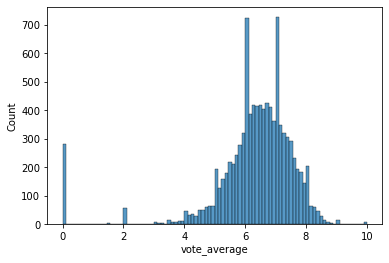

In [6]:
sns.histplot(x="vote_average",data=movieDF)

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

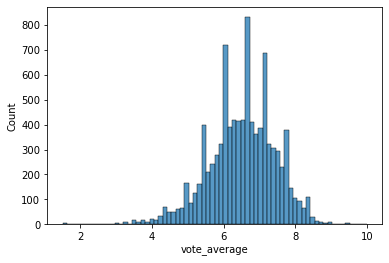

In [7]:
movieDF = movieDF[movieDF['vote_count'] > 1]
sns.histplot(x="vote_average",data=movieDF)

<AxesSubplot:xlabel='vote_average', ylabel='Count'>

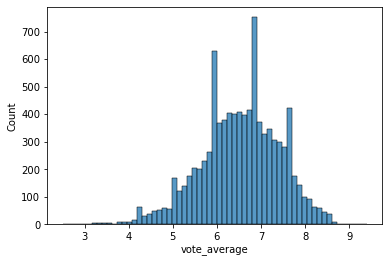

In [8]:
movieDF = movieDF[movieDF['vote_count'] > 10]
sns.histplot(x="vote_average",data=movieDF)

In [9]:
for ind, row in movieDF.iterrows():
    if 'Comedy' in row['genre']:
        print(row[['original_title','genre']])

original_title                                        Free Guy
genre             [Comedy, Action, Adventure, Science Fiction]
Name: 2, dtype: object
original_title    Matando Cabos 2, La Máscara del Máscara
genre                         [Action, Comedy, Adventure]
Name: 3, dtype: object
original_title            The Addams Family 2
genre             [Animation, Comedy, Family]
Name: 5, dtype: object
original_title    Последний богатырь: Корень зла
genre               [Fantasy, Adventure, Comedy]
Name: 9, dtype: object
original_title                           Jungle Cruise
genre             [Adventure, Fantasy, Comedy, Action]
Name: 20, dtype: object
original_title            The Boss Baby: Family Business
genre             [Animation, Comedy, Adventure, Family]
Name: 22, dtype: object
original_title                     PAW Patrol: The Movie
genre             [Animation, Family, Adventure, Comedy]
Name: 27, dtype: object
original_title    Werewolves Within
genre              [Comedy, Ho

Name: 885, dtype: object
original_title           Mamma Mia!
genre             [Comedy, Romance]
Name: 891, dtype: object
original_title           3 Idiots
genre             [Drama, Comedy]
Name: 894, dtype: object
original_title      Zombieland: Double Tap
genre             [Horror, Action, Comedy]
Name: 895, dtype: object
original_title                              The Grinch
genre             [Animation, Family, Comedy, Fantasy]
Name: 900, dtype: object
original_title    American Reunion
genre                     [Comedy]
Name: 903, dtype: object
original_title               劇場版トリニティセブン -天空図書館と真紅の魔王-
genre             [Animation, Action, Fantasy, Comedy]
Name: 905, dtype: object
original_title             30 Minutes or Less
genre             [Action, Adventure, Comedy]
Name: 907, dtype: object
original_title               The Hitman's Bodyguard
genre             [Thriller, Comedy, Crime, Action]
Name: 909, dtype: object
original_title                                       Rio
genre 

Name: 1809, dtype: object
original_title                                 Freaky
genre             [Horror, Thriller, Comedy, Fantasy]
Name: 1811, dtype: object
original_title                     Date Night
genre             [Comedy, Action, Adventure]
Name: 1812, dtype: object
original_title              Happy Death Day
genre             [Horror, Mystery, Comedy]
Name: 1818, dtype: object
original_title     Silver Linings Playbook
genre             [Drama, Comedy, Romance]
Name: 1819, dtype: object
original_title     This Is the End
genre             [Action, Comedy]
Name: 1823, dtype: object
original_title                                                 Home
genre             [Fantasy, Comedy, Animation, Science Fiction, ...
Name: 1824, dtype: object
original_title         Bachelorette
genre             [Comedy, Romance]
Name: 1830, dtype: object
original_title           Scott Pilgrim vs. the World
genre             [Comedy, Action, Romance, Fantasy]
Name: 1833, dtype: object
original

Name: 2754, dtype: object
original_title     Magic Mike XXL
genre             [Comedy, Drama]
Name: 2756, dtype: object
original_title               내안의 그놈
genre             [Fantasy, Comedy]
Name: 2761, dtype: object
original_title        Young Adult
genre             [Comedy, Drama]
Name: 2766, dtype: object
original_title                  Warm Bodies
genre             [Horror, Comedy, Romance]
Name: 2792, dtype: object
original_title    Delivery Man
genre                 [Comedy]
Name: 2795, dtype: object
original_title                   Paddington 2
genre             [Adventure, Comedy, Family]
Name: 2797, dtype: object
original_title    Demain tout commence
genre                  [Drama, Comedy]
Name: 2800, dtype: object
original_title    Ace Ventura: Pet Detective
genre                    [Comedy, Adventure]
Name: 2803, dtype: object
original_title        The Man from U.N.C.L.E.
genre             [Comedy, Action, Adventure]
Name: 2807, dtype: object
original_title    The Edge of 

Name: 3729, dtype: object
original_title               Jackass Number Two
genre             [Action, Comedy, Documentary]
Name: 3730, dtype: object
original_title    Barbershop: The Next Cut
genre                      [Comedy, Drama]
Name: 3732, dtype: object
original_title    Big Momma's House
genre               [Crime, Comedy]
Name: 3739, dtype: object
original_title       The Ballad of Buster Scruggs
genre             [Comedy, Drama, Western, Music]
Name: 3746, dtype: object
original_title       50 First Dates
genre             [Comedy, Romance]
Name: 3756, dtype: object
original_title           Astérix & Obélix contre César
genre             [Family, Adventure, Comedy, Fantasy]
Name: 3758, dtype: object
original_title    Bad Teacher
genre                [Comedy]
Name: 3761, dtype: object
original_title              Puss in Book: Trapped in an Epic Tale
genre             [Family, Fantasy, Animation, Comedy, Adventure]
Name: 3765, dtype: object
original_title                     Gre

Name: 4485, dtype: object
original_title                               The Nut Job
genre             [Animation, Comedy, Family, Adventure]
Name: 4488, dtype: object
original_title           Yours, Mine & Ours
genre             [Comedy, Family, Romance]
Name: 4490, dtype: object
original_title              Taxi 2
genre             [Action, Comedy]
Name: 4494, dtype: object
original_title                     Mannequin
genre             [Fantasy, Comedy, Romance]
Name: 4495, dtype: object
original_title               Spread
genre             [Comedy, Romance]
Name: 4496, dtype: object
original_title         Lego DC Batman: Family Matters
genre             [Animation, Family, Action, Comedy]
Name: 4497, dtype: object
original_title         The Upside
genre             [Comedy, Drama]
Name: 4498, dtype: object
original_title                     Free Birds
genre             [Animation, Comedy, Family]
Name: 4502, dtype: object
original_title                      अंधाधुन
genre             [C

Name: 5316, dtype: object
original_title         Bloody Hell
genre             [Horror, Comedy]
Name: 5318, dtype: object
original_title    National Lampoon's Vacation
genre                     [Comedy, Adventure]
Name: 5321, dtype: object
original_title        Asso
genre             [Comedy]
Name: 5327, dtype: object
original_title    Er ist wieder da
genre                     [Comedy]
Name: 5333, dtype: object
original_title    Office Christmas Party
genre                           [Comedy]
Name: 5336, dtype: object
original_title                                Rim of the World
genre             [Science Fiction, Adventure, Action, Comedy]
Name: 5342, dtype: object
original_title                                     玻璃樽
genre             [Adventure, Action, Comedy, Romance]
Name: 5349, dtype: object
original_title               This Means War
genre             [Action, Comedy, Romance]
Name: 5353, dtype: object
original_title    Wallace & Gromit: The Curse of the Were-Rabbit
genre    

Name: 6207, dtype: object
original_title    Definitely, Maybe
genre             [Comedy, Romance]
Name: 6208, dtype: object
original_title    Wish I Was Here
genre             [Drama, Comedy]
Name: 6212, dtype: object
original_title     Adieu les cons
genre             [Comedy, Drama]
Name: 6216, dtype: object
original_title                    Cocktail
genre             [Drama, Romance, Comedy]
Name: 6219, dtype: object
original_title        Bend It Like Beckham
genre             [Comedy, Drama, Romance]
Name: 6221, dtype: object
original_title    The King of Comedy
genre                [Drama, Comedy]
Name: 6222, dtype: object
original_title                  After Hours
genre             [Comedy, Thriller, Drama]
Name: 6229, dtype: object
original_title        Career Opportunities
genre             [Drama, Comedy, Romance]
Name: 6234, dtype: object
original_title           Børning 3
genre             [Action, Comedy]
Name: 6235, dtype: object
original_title    Middle School: The Worst

Name: 7052, dtype: object
original_title                      Fir Crazy
genre             [Comedy, Romance, TV Movie]
Name: 7054, dtype: object
original_title              Risky Business
genre             [Comedy, Romance, Drama]
Name: 7057, dtype: object
original_title                                      Tromeo & Juliet
genre             [Comedy, Drama, Romance, Action, Fantasy, Horr...
Name: 7061, dtype: object
original_title    Dennis the Menace Strikes Again!
genre                             [Comedy, Family]
Name: 7066, dtype: object
original_title           My Girl 2
genre             [Comedy, Family]
Name: 7068, dtype: object
original_title                   Hairspray
genre             [Comedy, Romance, Drama]
Name: 7069, dtype: object
original_title       Scared Shrekless
genre             [Animation, Comedy]
Name: 7072, dtype: object
original_title    Fright Night Part 2
genre                [Comedy, Horror]
Name: 7075, dtype: object
original_title       Irresistible
genre   

Name: 7920, dtype: object
original_title                 Chasing Amy
genre             [Comedy, Drama, Romance]
Name: 7922, dtype: object
original_title         Hooking Up
genre             [Drama, Comedy]
Name: 7925, dtype: object
original_title             Død snø
genre             [Horror, Comedy]
Name: 7929, dtype: object
original_title     Sex Pot
genre             [Comedy]
Name: 7931, dtype: object
original_title                Misbehaviour
genre             [Drama, History, Comedy]
Name: 7938, dtype: object
original_title                                        Underdog
genre             [Family, Action, Adventure, Comedy, Fantasy]
Name: 7939, dtype: object
original_title      Magic in the Moonlight
genre             [Comedy, Drama, Romance]
Name: 7941, dtype: object
original_title      The Man Who Invented Christmas
genre             [Drama, History, Comedy, Family]
Name: 7944, dtype: object
original_title    LEGO Jurassic World: The Secret Exhibit
genre                         

Name: 8663, dtype: object
original_title                 Parenthood
genre             [Comedy, Drama, Family]
Name: 8664, dtype: object
original_title    Bo Burnham: Make Happy
genre                    [Music, Comedy]
Name: 8672, dtype: object
original_title      Look Who's Talking Now!
genre             [Romance, Comedy, Family]
Name: 8674, dtype: object
original_title    Il a déjà tes yeux
genre                       [Comedy]
Name: 8675, dtype: object
original_title                         My Favorite Martian
genre             [Comedy, Drama, Family, Science Fiction]
Name: 8676, dtype: object
original_title                       Broken Flowers
genre             [Comedy, Drama, Mystery, Romance]
Name: 8677, dtype: object
original_title                    The Do-Over
genre             [Action, Adventure, Comedy]
Name: 8679, dtype: object
original_title         George of the Jungle 2
genre             [Adventure, Comedy, Family]
Name: 8681, dtype: object
original_title      The American

Name: 9383, dtype: object
original_title            Carnage
genre             [Comedy, Drama]
Name: 9384, dtype: object
original_title                        Sliding Doors
genre             [Comedy, Drama, Fantasy, Romance]
Name: 9385, dtype: object
original_title      Billy and Mandy's Big Boogey Adventure
genre             [Adventure, Comedy, Animation, TV Movie]
Name: 9388, dtype: object
original_title                       Frank
genre             [Comedy, Drama, Mystery]
Name: 9390, dtype: object
original_title       Benny & Joon
genre             [Comedy, Drama]
Name: 9391, dtype: object
original_title        New York, I Love You
genre             [Comedy, Drama, Romance]
Name: 9396, dtype: object
original_title          Get Over It
genre             [Comedy, Romance]
Name: 9399, dtype: object
original_title                                    A Wizard's Tale
genre             [Comedy, Animation, Adventure, Family, Fantasy]
Name: 9402, dtype: object
original_title    Election
genre

In [10]:
genreList = []

for ind,row in movieDF.iterrows():
    genreList.extend(row['genre'])
    
print(genreList)

['Science Fiction', 'Action', 'Science Fiction', 'Action', 'Comedy', 'Action', 'Adventure', 'Science Fiction', 'Action', 'Comedy', 'Adventure', 'Action', 'Adventure', 'Animation', 'Comedy', 'Family', 'Animation', 'Action', 'Adventure', 'Science Fiction', 'Horror', 'Thriller', 'Crime', 'Drama', 'Fantasy', 'Adventure', 'Comedy', 'Animation', 'Action', 'Crime', 'Thriller', 'Science Fiction', 'Adventure', 'Science Fiction', 'Drama', 'Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction', 'Fantasy', 'Action', 'Action', 'Adventure', 'Fantasy', 'Crime', 'Drama', 'Thriller', 'Horror', 'Fantasy', 'Mystery', 'Action', 'Crime', 'Thriller', 'Adventure', 'Fantasy', 'Comedy', 'Action', 'Science Fiction', 'Animation', 'Comedy', 'Adventure', 'Family', 'Animation', 'Adventure', 'Animation', 'Action', 'Adventure', 'Fantasy', 'Action', 'Action', 'Adventure', 'Science Fiction', 'Animation', 'Family', 'Adventure', 'Comedy', 'Horror', 'Mystery', 'Family', 'Horror', 'Mystery', 'Thriller', 'Comedy',

In [11]:
def my_function(x):
  return list( dict.fromkeys(x) )

genreList = my_function(genreList)

print(genreList)

['Science Fiction', 'Action', 'Comedy', 'Adventure', 'Animation', 'Family', 'Horror', 'Thriller', 'Crime', 'Drama', 'Fantasy', 'Mystery', 'Western', 'TV Movie', 'Romance', 'Music', 'History', 'War', 'Documentary']


In [28]:
Action = 0
Thriller = 0
Adventure = 0
Animation = 0
Comedy = 0
Fantasy = 0
Drama = 0
SciFi = 0
Documentary = 0
Crime = 0
Family = 0
Western = 0
History = 0
Romance = 0
Horror = 0
Mystery = 0
Musical = 0
Sport = 0
Music = 0
War = 0
TVmovie = 0



for col,row in movieDF.iterrows():
    if "Action" in row['genre']:
        Action = Action + 1
    if "Thriller" in row['genre']:
        Thriller = Thriller + 1
    if "Adventure" in row['genre']:
        Adventure  = Adventure + 1
    if "Animation" in row['genre']:
        Animation = Animation + 1
    if "Comedy" in row['genre']:
        Comedy = Comedy + 1
    if "Fantasy" in row['genre']:
        Fantasy = Fantasy + 1
    if "Drama" in row['genre']:
        Drama = Drama + 1
    if "Science Fiction" in row['genre']:
        SciFi = SciFi + 1
    if "Documentary" in row['genre']:
        Documentary = Documentary + 1
    if "Crime" in row['genre']:
        Crime = Crime + 1
    if "Family" in row['genre']:
        Family = Family + 1
    if "Western" in row['genre']:
        Western = Western + 1
    if "History" in row['genre']:
        History = History + 1
    if "Romance" in row['genre']:
        Romance = Romance + 1
    if "Horror" in row['genre']:
        Horror = Horror + 1
    if "Mystery" in row['genre']:
        Mystery = Mystery + 1
    if "Music" in row['genre']:
        Music = Music + 1
    if "War" in row['genre']:
        War = War + 1
    if "TV Movie" in row['genre']:
        TVmovie = TVmovie + 1
        
        
genreDict = dict(genre=['Action','Thriller','Adventure','Animation','Comedy','Fantasy','Drama','SciFi','Documentary','Crime','Family','Western','History','Romance','Horror','Mystery','Music','War','TV Movie'],
                 count=[Action,Thriller,Adventure,Animation,Comedy,Fantasy,Drama,SciFi,Documentary,Crime,Family,Western,History,Romance,Horror,Mystery,Music,War,TVmovie])

print(genreDict)

{'genre': ['Action', 'Thriller', 'Adventure', 'Animation', 'Comedy', 'Fantasy', 'Drama', 'SciFi', 'Documentary', 'Crime', 'Family', 'Western', 'History', 'Romance', 'Horror', 'Mystery', 'Music', 'War', 'TV Movie'], 'count': [2421, 2470, 1652, 1255, 2879, 1206, 3533, 1197, 222, 1176, 1264, 110, 374, 1311, 1486, 779, 301, 246, 212]}


In [29]:
genres = pd.DataFrame.from_dict(genreDict)
genres = genres.sort_values('count',ascending=False)
genres.head(25)

,genre,count
6,Drama,3533
4,Comedy,2879
1,Thriller,2470
0,Action,2421
2,Adventure,1652
14,Horror,1486
13,Romance,1311
10,Family,1264
3,Animation,1255
5,Fantasy,1206


In [30]:
fig = px.bar(x=genres['genre'],y=genres['count'],labels=dict(x="Genre",y="Count"),title="Count of movie genres")
fig.show()

In [31]:
movieDF.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"[Science Fiction, Action]"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"[Science Fiction, Action]"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"[Comedy, Action, Adventure, Science Fiction]"
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"[Action, Comedy, Adventure]"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"[Action, Adventure]"


In [32]:
#url = "https://imdb8.p.rapidapi.com/title/auto-complete"
#
#querystring = {"q":"Free Guy"}
#
#headers = {
#    'x-rapidapi-key': "d46caec696msh36bd6d85e9effe2p10a6b3jsn7171d52217cc",
#    'x-rapidapi-host': "imdb8.p.rapidapi.com"
#    }
#
#response = requests.request("GET", url, headers=headers, params=querystring)
#
#print(response.text)

In [33]:
movies = ia.search_movie('matrix')
movies[0]

<Movie id:0133093[http] title:_The Matrix (1999)_>

In [34]:
movieDFHigh = movieDF.sort_values('vote_average', ascending=False)
movieDFHigh = movieDFHigh[movieDFHigh['original_language'] == 'en']

movieTop50 = movieDFHigh.head(50)

In [35]:
#ratings = []
#
#for ind,row in movieTop50.iterrows(): 
#    code = ia.search_movie(row['original_title'])[0].movieID
#    rating = ia.get_movie(code).data['rating']
#    ratings.append(rating)    
#
#print(ratings)

In [36]:
#movieTop50['IMDB_rating'] = ratings
#movieTop50.head()

In [37]:
movieTop50 = pd.read_csv("movieTop50.csv")
movieTop50.head()

,id,original_language,Title,popularity,release_date,TMDB rating,vote_count,genre,IMDB rating
0,654754,en,Billie Eilish: The World's a Little Blurry,15.367,2021-02-26,8.7,195,"['Documentary', 'Music']",7.8
1,278,en,The Shawshank Redemption,58.255,1994-09-23,8.7,19908,"['Drama', 'Crime']",9.3
2,724089,en,Gabriel's Inferno Part II,9.417,2020-07-31,8.7,1314,['Romance'],6.8
3,738362,en,The Fresh Prince of Bel-Air Reunion Special,9.725,2020-11-18,8.7,106,['Documentary'],8.3
4,238,en,The Godfather,61.648,1972-03-14,8.7,14928,"['Drama', 'Crime']",9.2


In [43]:
df1 = movieTop50
df1.rename(columns={"vote_average":"TMDB rating","IMDB_rating":"IMDB rating","original_title":"Title"},inplace=True)

fig = px.scatter(df1,
                 x="TMDB rating",
                 y="IMDB rating",
                 title='TMDB ratings vs IMDB ratings van top 50 TMDB films',
                 labels=dict(x='TMDB rating',y='IMDB rating'),
                 color="Title",
                 hover_name="Title",
                 hover_data=["TMDB rating","IMDB rating","genre"])
fig.update_layout(legend_title_text='Movie name')
fig.show()

In [39]:
movieDF.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021-09-30,7.0,828,"[Science Fiction, Action]"
1,335983,en,Venom,3012.242,2018-09-28,6.8,11846,"[Science Fiction, Action]"
2,550988,en,Free Guy,3864.616,2021-08-11,7.8,2908,"[Comedy, Action, Adventure, Science Fiction]"
3,772436,es,"Matando Cabos 2, La Máscara del Máscara",2556.789,2021-10-01,7.7,34,"[Action, Comedy, Adventure]"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021-07-22,6.9,685,"[Action, Adventure]"


In [40]:
for genre in genreList: 
    print(genre)

Science Fiction
Action
Comedy
Adventure
Animation
Family
Horror
Thriller
Crime
Drama
Fantasy
Mystery
Western
TV Movie
Romance
Music
History
War
Documentary


In [41]:
movieTop50.head()

,id,original_language,Title,popularity,release_date,TMDB rating,vote_count,genre,IMDB rating
0,654754,en,Billie Eilish: The World's a Little Blurry,15.367,2021-02-26,8.7,195,"['Documentary', 'Music']",7.8
1,278,en,The Shawshank Redemption,58.255,1994-09-23,8.7,19908,"['Drama', 'Crime']",9.3
2,724089,en,Gabriel's Inferno Part II,9.417,2020-07-31,8.7,1314,['Romance'],6.8
3,738362,en,The Fresh Prince of Bel-Air Reunion Special,9.725,2020-11-18,8.7,106,['Documentary'],8.3
4,238,en,The Godfather,61.648,1972-03-14,8.7,14928,"['Drama', 'Crime']",9.2


In [48]:
fig = go.Figure()

for genre in genreList:
    tempList = [genre]
    tempDF = movieDF['genre'].apply(lambda s: len(set(s) & set(tempList)) > 0)
    df = movieDF[tempDF]
    fig.add_trace(go.Histogram(x=df['vote_average'],legendgroup=genre,showlegend=True,name=genre))#legendgrouptitle={"text":genre}))


fig.update_layout(title="Verdeling cijfers van films per genre",xaxis_title="Cijfer",yaxis_title="Aantal waarnemingen")    

fig.show()